# Exploring the tmdb-movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Movies have been a great part of our lives and how can you tell a successful movie from unsuccessful ones? Or, how can you tell if some genres are more favorable than others? 
> The "tmdb-movies.csv" data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> By exploring this data set, some of the interesting questions about movies can be unwinded.


> In this project, I will investigate:


> 1) The top 5 most profitable genres


> If I was exploring a gnere to produce my next movie, I would want to see which are the top 5 genres that make highest return on investment.

> 2) Top 10 directors make the most movie profit

> The same with directors. If I was to hire a director to direct my next movie, I would want to hire within the top 10 directors that would make the highest return on investment.

> I will be using the following data:
> Genre,
> Release year,
> Director,
> Revenue,
> and Profit

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [22]:
import pandas as pd
import numpy as np
import collections as cl
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

df = pd.read_csv('tmdb-movies.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Cleaning

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [24]:
# Fill in missing values
df.fillna('None')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

<a id='eda'></a>
## Exploratory Data Analysis

### What are the most 5 profitable genres?

In [25]:
# create a profil column with profit = revenue - budget
df['profit'] = df['revenue'] - df['budget']

In [26]:
# sort data according to the sample numbers & select top 5
df1 = df.groupby(['genres'])[['id']].count().sort_values(by=['id'], ascending=False)[0:5]
df_new = df[df['genres'].isin(df1.index.values.tolist())]

# remove movies that did not make any profit
df_new1 = df_new[df_new['profit']>0]

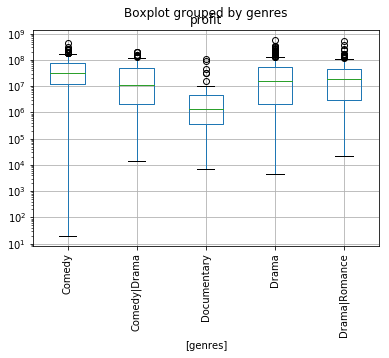

In [27]:
df_new1.boxplot(column=['profit'], by=['genres'], rot=90).set_yscale('log')

### Which director makes the highest profit on average?

In [28]:
# calculate the average budget, revenue and profit made by each director
df_profit = df.groupby(['director']).mean()[['budget', 'revenue', 'profit']]

In [29]:
# View the top 10 profitable directors
df_profit = df_profit.sort_values(by=['profit'], ascending=False).head(10)

In [30]:
df_profit

,budget,revenue,profit
director,,,
Kyle Balda|Pierre Coffin,74000000.0,1.156731e+09,1.082731e+09
Lee Unkrich,200000000.0,1.063172e+09,8.631719e+08
Andrew Stanton|Lee Unkrich,94000000.0,8.646260e+08,7.706260e+08
Andrew Adamson|Kelly Asbury|Conrad Vernon,150000000.0,9.198388e+08,7.698388e+08
Roger Allers|Rob Minkoff,45000000.0,7.882418e+08,7.432418e+08
Pierre Coffin|Chris Renaud,72500000.0,7.571379e+08,6.846379e+08
Colin Trevorrow,75375000.0,7.587683e+08,6.833933e+08
Pete Docter,175000000.0,8.537086e+08,6.787086e+08
David Yates,155000000.0,8.308591e+08,6.758591e+08


In [31]:
df_profit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Kyle Balda|Pierre Coffin to Chris Miller|Raman Hui
Data columns (total 3 columns):
budget     10 non-null float64
revenue    10 non-null float64
profit     10 non-null float64
dtypes: float64(3)
memory usage: 320.0+ bytes


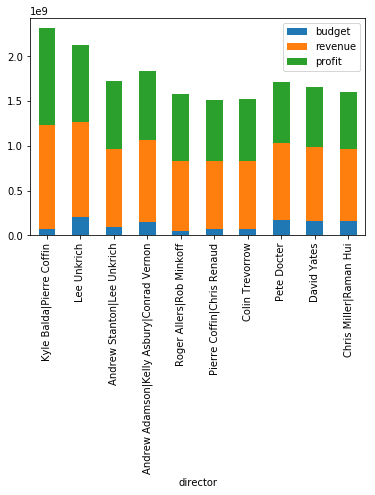

In [32]:
df_profit.plot.bar(stacked=True)

<a id='conclusions'></a>
## Conclusions

#### Research question 1 "What are the most 5 profitable genres? " result:

Comedy movies have the widest profit range starting at just around 20 and going up to 100 million USD. This wide range in term of profit poses an investment risk for those who choose to invest in producing comedy movies as it can either be a big hit or almost nothing.

Documentary also does not bring great profit as the maximum profit this genre usually can bring is 10 million USD and starting as low as just below 10,000 USD.

Comedy & Drama, Drama, and Drama & Romance on the other hand are much safer investments. Movies within these three genres usually make profits between 10,000 USD and up to 100 million USD. Some movies make exceptional cases of greater profits than usual, and are aalmost up to 1 billion USD in profit.

A limitation to this analysis is it looks closely to the profit range and does not include other factors like the budget span. The budget of a movie may determine the agressiveness of that movie return on investment. 

For further investigation, we can look at the range of the budget spend for these 5 genres

#### Research question 2 "Which director makes the highest profit on average?" result:

Movies co-directed by Kyle Balda and Pierre Coffin results profits the most with over $1.08 billion USD.

Come second are movies directed by Lee Unkrich with over $863 million USD in profit.

Movies co-directed by Andrew Stanton & Lee Unkrich, Andrew Adamson & Kelly Asbury & Conard Vemon, Roger Allers & Rob Minkoff brought a profit of $770, $769 and $748 million USD respectively.

Lastly on the top list are Colin Trevorrow, Pete Docter, David Yates, Chris Miller & Raman Hui's movies with $684, $683, $677, $675, and $638 million USD respectively.

Film production firms would want to hire the directors on this list to make a high return on investment for the next movie.

A limitation to this analysis is director is not the only factor that contributes to the success of a movie. Other factors such as the casts or runtime can also affect the profit.

For further exploration, we can take a look at the cast and runtime to see if there would be asignificant changes in moview profits

#### Dataset limitation

Although this tmdb-movie dataset contains many valuable variables, there are still some limitations to it. One of the variable would be a game changer for this dataset is number of the ticket box sold or number of total views for each movie.

Other factors such as how a moview was marketed to the audience, was one of the cast had some scandal during the release time, or the movie title is not attractive enough can also make a difference in a movie success.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0